In [25]:
from urllib.request import urlopen
from PIL import Image
import timm

# img = Image.open(urlopen(
#     'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
# ))
image_path = "./download.jpeg"
img = Image.open(image_path)

model = timm.create_model(
    "maxvit_tiny_tf_512.in1k",
    pretrained=True,
    features_only=True,
)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

output = model(transforms(img).unsqueeze(0))  # unsqueeze single image into batch of 1

for o in output:
    # print shape of each feature map in output
    # e.g.:
    #  torch.Size([1, 64, 256, 256])
    #  torch.Size([1, 64, 128, 128])
    #  torch.Size([1, 128, 64, 64])
    #  torch.Size([1, 256, 32, 32])
    #  torch.Size([1, 512, 16, 16])

    print(o.shape)

torch.Size([1, 64, 256, 256])
torch.Size([1, 64, 128, 128])
torch.Size([1, 128, 64, 64])
torch.Size([1, 256, 32, 32])
torch.Size([1, 512, 16, 16])


In [26]:
from urllib.request import urlopen
from PIL import Image
import timm
import torch

# img = Image.open(urlopen(
#     'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
# ))

model = timm.create_model("maxvit_tiny_tf_512.in1k", pretrained=True)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

output = model(transforms(img).unsqueeze(0))  # unsqueeze single image into batch of 1
print(output.softmax(dim=1).shape)
top5_probabilities, top5_class_indices = torch.topk(output.softmax(dim=1) * 100, k=5)

torch.Size([1, 1000])


In [27]:
class_index_to_class_name_dict_path = "./class_index_to_class_name.txt"
with open(class_index_to_class_name_dict_path, "r") as f:
    class_index_to_class_name_dict = eval(f.read())
class_index_to_class_name_dict[3]

'tiger shark, Galeocerdo cuvieri'

In [28]:
top5_probabilities

tensor([[35.6692, 27.4690,  4.4986,  3.5497,  0.9552]],
       grad_fn=<TopkBackward0>)

In [29]:
top5_class_indices_list = top5_class_indices.squeeze(0).tolist()
top5_class_indices_list

[817, 581, 627, 479, 436]

In [30]:
for top5_class_indice in top5_class_indices_list:
    print(class_index_to_class_name_dict[top5_class_indice])

sports car, sport car
grille, radiator grille
limousine, limo
car wheel
beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon


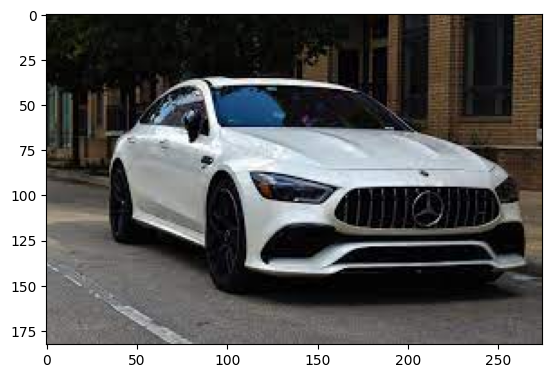

In [31]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [8]:
image_1_path = "/Users/user/Documents/Coding/geo/example_notebooks/image_1.png"
image_2_path = "/Users/user/Documents/Coding/geo/example_notebooks/image_2.png"

In [9]:
from PIL import Image

# open as RGB (3 channels)

image_1 = Image.open(image_1_path).convert("RGB")
image_2 = Image.open(image_2_path).convert("RGB")

In [10]:
# print image_1.size
print(image_1.size)
print(image_2.size)

(1855, 1848)
(1860, 1835)


In [11]:
input_size = 512
image_1 = image_1.resize((input_size, input_size))
image_2 = image_2.resize((input_size, input_size))

In [12]:
# image_1 rotate 90 180 270
image_1_90 = image_1.transpose(Image.ROTATE_90)
image_1_180 = image_1.transpose(Image.ROTATE_180)
image_1_270 = image_1.transpose(Image.ROTATE_270)

/var/folders/9g/3rr3k99j0td2974k71sy46_h0000gp/T/ipykernel_45109/2437528858.py:2: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  image_1_90 = image_1.transpose(Image.ROTATE_90)
/var/folders/9g/3rr3k99j0td2974k71sy46_h0000gp/T/ipykernel_45109/2437528858.py:3: DeprecationWarning: ROTATE_180 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_180 instead.
  image_1_180 = image_1.transpose(Image.ROTATE_180)
/var/folders/9g/3rr3k99j0td2974k71sy46_h0000gp/T/ipykernel_45109/2437528858.py:4: DeprecationWarning: ROTATE_270 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_270 instead.
  image_1_270 = image_1.transpose(Image.ROTATE_270)


In [13]:
# feed model net
from urllib.request import urlopen
from PIL import Image
import timm

# img = Image.open(urlopen(
#     'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
# ))
# img = image_1
output_list = []
for img in [image_1, image_2, image_1_90, image_1_180, image_1_270]:
    print(img.size)
    print(type(img))
    model = timm.create_model(
        "maxvit_tiny_tf_512.in1k",
        pretrained=True,
        num_classes=0,  # remove classifier nn.Linear
    )
    model = model.eval()

    # get model specific transforms (normalization, resize)
    data_config = timm.data.resolve_model_data_config(model)
    transforms = timm.data.create_transform(**data_config, is_training=False)

    output = model(
        transforms(img).unsqueeze(0)
    )  # output is (batch_size, num_features) shaped tensor

    # or equivalently (without needing to set num_classes=0)

    output = model.forward_features(transforms(img).unsqueeze(0))
    # output is unpooled, a (1, 512, 16, 16) shaped tensor

    output = model.forward_head(output, pre_logits=True)
    output_list.append(output)
    # output is a (1, num_features) shaped tensor

(512, 512)
<class 'PIL.Image.Image'>
(512, 512)
<class 'PIL.Image.Image'>
(512, 512)
<class 'PIL.Image.Image'>
(512, 512)
<class 'PIL.Image.Image'>
(512, 512)
<class 'PIL.Image.Image'>


In [14]:
output_2 = output

In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


def calculate_cosine_similarity(embedding1, embedding2):
    """
    Calculate the cosine similarity between two image embeddings.

    Parameters:
    - embedding1: Numpy array representing the first image embedding.
    - embedding2: Numpy array representing the second image embedding.

    Returns:
    - Cosine similarity score between the two embeddings (a value between -1 and 1).
    """
    embedding1 = np.reshape(
        embedding1, (1, -1)
    )  # Reshape for sklearn's cosine_similarity
    embedding2 = np.reshape(embedding2, (1, -1))
    similarity_score = cosine_similarity(embedding1, embedding2)
    return similarity_score[0, 0]


# Example usage:
# embedding1 = output_1.detach().numpy()  # Replace with your actual image embeddings
# # embedding2 = output_1.detach().numpy()  # Replace with your actual image embeddings
# embedding2 = output_2.detach().numpy()  # Replace with your actual image embeddings

# similarity_score = calculate_cosine_similarity(embedding1, embedding2)
# print("Cosine Similarity:", similarity_score)

In [20]:
embedding_dict = {
    "image_1": output_list[0].detach().numpy(),
    "image_2": output_list[1].detach().numpy(),
    "image_1_90": output_list[2].detach().numpy(),
    "image_1_180": output_list[3].detach().numpy(),
    "image_1_270": output_list[4].detach().numpy(),
}
for image_name, embedding in embedding_dict.items():
    embedding1 = embedding_dict["image_1"]  # Replace with your actual image embeddings
    embedding2 = embedding
    similarity_score = calculate_cosine_similarity(embedding1, embedding2)
    print("image_1 and", image_name)
    print("Cosine Similarity:", similarity_score)
    print()

image_1 and image_1
Cosine Similarity: 0.9999997

image_1 and image_2
Cosine Similarity: 0.9921556

image_1 and image_1_90
Cosine Similarity: 0.7806501

image_1 and image_1_180
Cosine Similarity: 0.9366753

image_1 and image_1_270
Cosine Similarity: 0.8292346

